# Exercice 2 : la courbe de Von Koch 



L'objectif de cet exercice est de vous faire coder l'une des fractales les plus célèbres : la courbe de Von Koch, qui vous a été présenté la première semaine dans les exercices, et de vous faire observer l'autosimilarité de cet objet.

 

Une brève illustration des trois premières itérations du flocon :


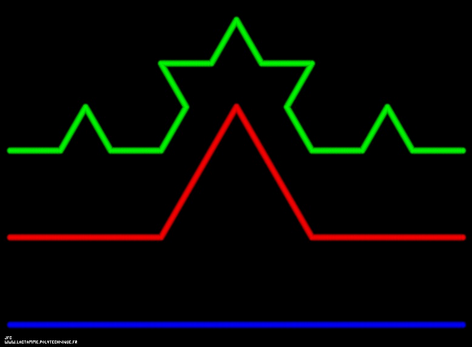

La totalité de l'exercice se fera dans ce notebook.

## Fonctionnement de l'algorithme

Afin de tracer la fractale vous allez suivre l'algorithme suivant :

Cet algorithme utilisera donc une fonction récursive. Nous aborderons ce point plus en détail au moment de coder celle-ci.

 ## 1- Initialisation du programme


Importons tout d'abord les librairies nécessaires.

In [2]:
# On commence par importer le module matplotlib qui nous 
# permettra de tracer la figureet le module time qui 
# nous permettra de mesurer le temps.
import matplotlib.pyplot as plt
import time
from numpy import sqrt

Définissez le nombre d'itérations ainsi que le nombre de segments et de sommets de la courbe qui en découlent.

In [3]:
# On fixe le nombre d'itération que l'on souhaite obtenir. 
# Ce nombre d'itération doit être positif
nombre_iterations = 3

# On en déduit le nombre de segments de la fractale 
nombre_segments = 4** nombre_iterations 

# On en déduit le nombre de sommets 
nombre_sommets = nombre_segments + 1

Vous stockerez les positions des sommets sous la forme de deux tableaux :
- un tableau contenant tous les abscices
- un tableau contenant toutes les ordonnées

la position dans le tableau définissant à quel sommet appartient la coordonnée. Les sommets se succéderont dans l'odre du tracé.

Il vous faut donc créer ces tableaux.

In [4]:
abscices_tab = [float('inf')] * nombre_sommets
ordonnees_tab = [float('inf')] * nombre_sommets

Il vous faut désormais placer les deux extremités de la courbe.

In [5]:
# première extrémité
abscices_tab[0] = 0
ordonnees_tab[0] = 0

# deuxième extrémité
abscices_tab[-1] = 100
ordonnees_tab[-1] = 0

## 2- Coeur du programme

Vous allez maintenant pas à pas définir la fonction placer_sommets qui constituera le coeur du programme. 
Voici ses spécifications :

In [6]:
def placer_sommets(indice1, indice2) :
    """
    Prérequis :
    indice1 et indice2 sont des entiers positifs strictements inférieurs à
    len(abscices_tab)=len(ordonnees_tab). indice1 < indice2 et 
    |indice2 - indice1| - 1 est une puissance de trois. Cette 
    dernière condition assure qu'il reste bien à placer un nombre de 
    sommets cohérent avec la courbe de Von-Koch.
    
    Rempli les coordonnées des sommets d'indice compris entre indice1 et indice2
    dans les tableaux abscices_tab et ordonnees_tab.
    
    Ne renvoie rien.
    """
    pass

On se placera dans un premier temps uniquement dans le cas où |indice2 - indice1| = 4, c'est à dire qu'il y a exactement trois sommets à placer entre les deux sommets considérés. Il s'agit donc de la dernière itération de la courbe.

Regardons comment placer les points à l'aide de la figure ci-dessous.

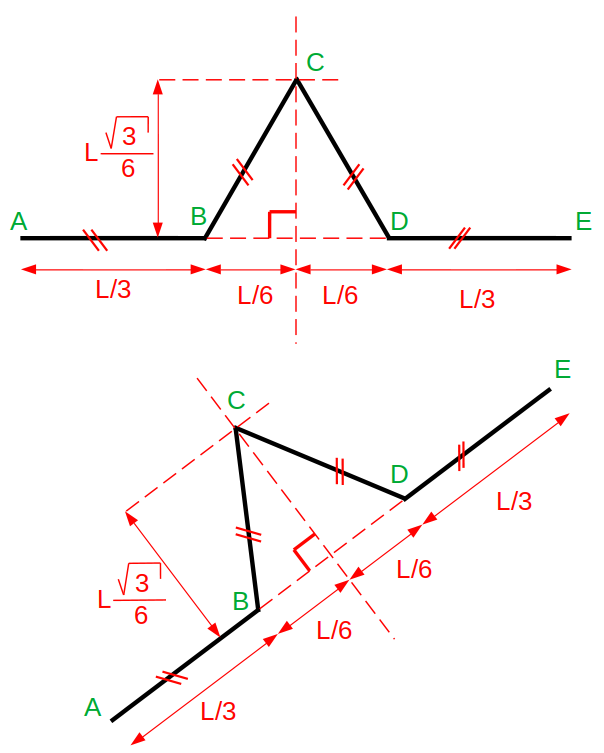

Le premier et le troisième point sont faciles à placer. Ils se situent sur l'axe entre les deux extrémité divisant le segment en trois sous-segments de même longueur.

Pour le deuxième point, il se trouve à mi-chemin entre les deux segments mais décallé de $L \frac{\sqrt{3}}{6}$ orthogonalement au segment avec L la distance séparant A de E.

Ainsi, les coordonnées des points B, C et D sont les suivantes :

$(B_x, B_y) = (A_x + \frac{E_x - A_x}{3}, A_y + \frac{E_y - A_y}{3}) $

$(C_x, C_y) = (A_x + \frac{E_x - A_x}{2} - (E_y - A_y) \frac{\sqrt{3}}{6}, A_y + (E_x - A_x) \frac{\sqrt{3}}{6}) $

$(D_x, D_y) = (E_x - \frac{B_x - A_x}{3}, E_y - \frac{E_y - A_y}{3}) $

Remplissez maintenant la fonction placer_sommet en vous aidant de ces formules. Vous noterez que celles-ci ne sont plus valide si les coordonnées de A et E sont échangées (cela retourne le triangle). Il faudra donc s'assurer que indice1 < indice2.

À toutes fins utile, nous rappellons que la fonction sqrt prend en argument un flottant ou un entier et renvoie sa racine carrée.

In [7]:
def placer_sommets(indice1, indice2) :
    """
    Prérequis :
    indice1 et indice2 sont des entiers positifs strictements inférieurs à
    len(abscices_tab)=len(ordonnees_tab). indice1 < indice2 et 
    |indice2 - indice1| - 1 est une puissance de trois. Cette 
    dernière condition assure qu'il reste bien à placer un nombre de 
    sommets cohérent avec la courbe de Von-Koch.
    
    Rempli les coordonnées des sommets d'indice compris entre indice1 et indice2
    dans les tableaux abscices_tab et ordonnees_tab.
    
    Ne renvoie rien.
    """
    # On vérifie que indice1 et indice2 sont bien des indices 
    # d'éléments d'abscices_tab et d'ordonnees_tab
    assert(indice1 >= 0 and indice1 < len(abscices_tab))
    assert(indice2 >= 0 and indice2 < len(abscices_tab))
    # On vérifie que indice1 < indice2
    assert(indice1 < indice2)
    # On vérifie que le nombre de sommets entre indice1 et indice2
    # est bien un multiple de trois. Il doit en réalité être une
    # puissance de trois, cependant, ce test simple peut permettre
    # de détecter facilement d'éventuelles erreurs.
    assert((indice2 - indice1 - 1) % 3 == 0)
    
    # On utilisera les notation de la figure ci-dessus.   
    
    Ax = abscices_tab[indice1]
    Ay = ordonnees_tab[indice1]
    Ex = abscices_tab[indice2]
    Ey = ordonnees_tab[indice2]
    
    # Point B
    abscices_tab[indice1 + 1]  = Ax + (Ex - Ax) / 3
    ordonnees_tab[indice1 + 1] = Ay + (Ey - Ay) / 3
    
    # Point C
    abscices_tab[indice1 + 2]  = Ax + (Ex - Ax) / 2 - (Ey - Ay) * sqrt(3) / 6
    ordonnees_tab[indice1 + 2] = Ay + (Ey - Ay) / 2 + (Ex - Ax) * sqrt(3) / 6
        
    # Point D    
    abscices_tab[indice2 - 1]  = Ex - (Ex - Ax) / 3
    ordonnees_tab[indice2 - 1] = Ey - (Ey - Ay) / 3

Testez votre fonction.

In [8]:
indice1 = 0
indice2 = 4
abscices_tab[indice1] = 0
ordonnees_tab[indice1] = 0
abscices_tab[indice2] = 10
ordonnees_tab[indice2] = 0

placer_sommets(indice1, indice2)
print("abscices : ", abscices_tab)
print("ordonnees :", ordonnees_tab)

abscices :  [0, 3.3333333333333335, 5.0, 6.666666666666666, 10, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 100]
ordonnees : [0, 0.0, 2.8867513459481287, 0.0, 0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0]


Il vous faut maintenant prendre en compte les autres cas de figure.
Copier ce que vous avez fait dans la cellule ci-dessous et modifier si besoin votre code pour que la fonction effectue une itération même |indice2 - indice1| > 3. Lorsqu'elle effectue une itération, elle ne renseigne que les points des sommets. 

In [9]:
def placer_sommets(indice1, indice2) :
    """
    Prérequis :
    indice1 et indice2 sont des entiers positifs strictements inférieurs à
    len(abscices_tab)=len(ordonnees_tab). indice1 < indice2 et 
    |indice2 - indice1| - 1 est une puissance de trois. Cette 
    dernière condition assure qu'il reste bien à placer un nombre de 
    sommets cohérent avec la courbe de Von-Koch.
    
    Rempli les coordonnées des sommets d'indice compris entre indice1 et indice2
    dans les tableaux abscices_tab et ordonnees_tab.
    
    Ne ren𝐴𝑦+(𝐸𝑥voie rien.
    """
    # On vérifie que indice1 et indice2 sont bien des indices 
    # d'éléments d'abscices_tab et d'ordonnees_tab
    assert(indice1 >= 0 and indice1 < len(abscices_tab))
    assert(indice2 >= 0 and indice2 < len(abscices_tab))
    # On vérifie que indice1 < indice2
    assert(indice1 < indice2)
    # On vérifie que le nombre de sommets entre indice1 et indice2
    # est bien un multiple de trois. Il doit en réalité être une
    # puissance de trois, cependant, ce test simple peut permettre
    # de détecter facilement d'éventuelles erreurs.
    assert((indice2 - indice1 - 1) % 3 == 0)
    
    # On utilisera les notation de la figure ci-dessus.   
    
    Ax = abscices_tab[indice1]
    Ay = ordonnees_tab[indice1]
    Ex = abscices_tab[indice2]
    Ey = ordonnees_tab[indice2]
    
    # On définit d le tiers de la distance entre indice1
    # et indice2
    d = int((indice2 - indice1) / 4)
    
    # Point B
    abscices_tab[indice1 + d]  = Ax + (Ex - Ax) / 3
    ordonnees_tab[indice1 + d] = Ay + (Ey - Ay) / 3
    
    # Point C
    abscices_tab[indice1 + 2 * d]  = Ax + (Ex - Ax) / 2 - (Ey - Ay) * sqrt(3) / 6
    ordonnees_tab[indice1 + 2 * d] = Ay + (Ey - Ay) / 2 + (Ex - Ax) * sqrt(3) / 6
        
    # Point D    
    abscices_tab[indice2 - d]  = Ex - (Ex - Ax) / 3
    ordonnees_tab[indice2 - d] = Ey - (Ey - Ay) / 3

Tester de nouveau votre fonction dans le cas où indice2 - indice1 > 4 et dans le cas où indice2 - indice1 = 4. N'oubliez pas que abscices_tab et ordonnees_tab ont déjà été modifié. Si besoin, vous pouvez les réinitialiser.

In [10]:
#-------Initialisation des variables-------
abscices_tab = [float('inf')] * nombre_sommets
ordonnees_tab = [float('inf')] * nombre_sommets
# première extrémité
abscices_tab[0] = 0
ordonnees_tab[0] = 0
# deuxième extrémité
abscices_tab[-1] = 100
ordonnees_tab[-1] = 0

# indices
indice1 = 0
indice2 = 4
abscices_tab[indice1] = 0
ordonnees_tab[indice1] = 0
abscices_tab[indice2] = 10
ordonnees_tab[indice2] = 0

indice3 = 4
indice4 = 4 + 4**2 
abscices_tab[indice3] = 10
ordonnees_tab[indice3] = 0
abscices_tab[indice4] = 50
ordonnees_tab[indice4] = 0

#-----------------Calculs--------------
placer_sommets(indice1, indice2)
print("abscices premier test : ", abscices_tab)
print("ordonnees premier test :", ordonnees_tab)
placer_sommets(indice3, indice4)
print("abscices premier test : ", abscices_tab)
print("ordonnees premier test :", ordonnees_tab)

abscices premier test :  [0, 3.3333333333333335, 5.0, 6.666666666666666, 10, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 50, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 100]
ordonnees premier test : [0, 0.0, 2.8867513459481287, 0.0, 0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 0]
abscices premier test :  [0, 3.3333333333333335, 5.0, 6.666666666666666, 10, inf, inf, inf, 23.333333333333336, inf, inf, inf, 30.0, inf, inf, inf, 36.666666666666664, inf, inf, inf, 50, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,

Il vous faut maintenant traiter les sommets éventuels situés entre indice1 et indice2. Il vous faudra pour cela appeler placer_sommets au sein de cette même fonction. C'est ce que l'on appelle la récursivité.

Plus précisément, vous aurez besoin d'appeler placer_sommets uniquement si |indice2 - indice1| > 4 car sinon c'est que le nombre maximal d'itérations a été atteint.

Si vous devez faire appel à placer_sommets, combien de couples de sommets sont concernés ?

Recopier ce que vous avez déjà codé pour finir de remplir la fontion placer_sommets. 

ATTENTION : ne donner à placer_sommets que des arguments de type int. Pour transformer un flottant en entier, il vous faut utiliser la fonction int qui prend en argument un flottant et renvoie un entier. Pour plus de précision utiliser la fonction help.

In [11]:
def placer_sommets(indice1, indice2) :
    """
    Prérequis :
    indice1 et indice2 sont des entiers positifs strictements inférieurs à
    len(abscices_tab)=len(ordonnees_tab). indice1 < indice2 et 
    |indice2 - indice1| - 1 est une puissance de trois. Cette 
    dernière condition assure qu'il reste bien à placer un nombre de 
    sommets cohérent avec la courbe de Von-Koch.
    
    Rempli les coordonnées des sommets d'indice compris entre indice1 et indice2
    dans les tableaux abscices_tab et ordonnees_tab.
    
    Ne renvoie rien.
    """
    # On vérifie que indice1 et indice2 sont bien des indices 
    # d'éléments d'abscices_tab et d'ordonnees_tab
    assert(indice1 >= 0 and indice1 < len(abscices_tab))
    assert(indice2 >= 0 and indice2 < len(abscices_tab))
    
    # On vérifie que indice1 < indice2
    assert(indice1 < indice2)
    
    # On vérifie que le nombre de sommets entre indice1 et indice2
    # est bien un multiple de trois. Il doit en réalité être une
    # puissance de trois, cependant, ce test simple peut permettre
    # de détecter facilement d'éventuelles erreurs.
    assert((indice2 - indice1 - 1) % 3 == 0)
    
    # On utilisera les notation de la figure ci-dessus.   
    
    Ax = abscices_tab[indice1]
    Ay = ordonnees_tab[indice1]
    Ex = abscices_tab[indice2]
    Ey = ordonnees_tab[indice2]
    
    # On définit d le tiers de la distance entre indice1
    # et indice2
    d = int((indice2 - indice1) / 4)
    
    # Point B
    abscices_tab[indice1 + d]  = Ax + (Ex - Ax) / 3
    ordonnees_tab[indice1 + d] = Ay + (Ey - Ay) / 3
    
    # Point C
    abscices_tab[indice1 + 2 * d]  = Ax + (Ex - Ax) / 2 - (Ey - Ay) * sqrt(3) / 6
    ordonnees_tab[indice1 + 2 * d] = Ay + (Ey - Ay) / 2 + (Ex - Ax) * sqrt(3) / 6
        
    # Point D    
    abscices_tab[indice2 - d]  = Ex - (Ex - Ax) / 3
    ordonnees_tab[indice2 - d] = Ey - (Ey - Ay) / 3
    
    if indice2 - indice1 > 4 :
        placer_sommets(indice1, indice1 + d)
        placer_sommets(indice1 + d, indice1 + 2 * d)
        placer_sommets(indice1 + 2 * d, indice2 - d)
        placer_sommets(indice2 - d, indice2 )

Testez de nouveau votre fonction dans des cas différents.

In [12]:
#-------Initialisation des variables-------
abscices_tab = [float('inf')] * nombre_sommets
ordonnees_tab = [float('inf')] * nombre_sommets
# première extrémité
abscices_tab[0] = 0
ordonnees_tab[0] = 0
# deuxième extrémité
abscices_tab[-1] = 100
ordonnees_tab[-1] = 0

#-----------------Calculs--------------
placer_sommets(0, len(abscices_tab) - 1)
print("abscices : ", abscices_tab)
print("ordonnees :", ordonnees_tab)

abscices :  [0, 3.703703703703704, 5.555555555555556, 7.407407407407408, 11.111111111111112, 12.962962962962964, 11.111111111111112, 14.814814814814817, 16.666666666666668, 18.51851851851852, 22.22222222222222, 20.37037037037037, 22.22222222222222, 25.925925925925927, 27.77777777777778, 29.62962962962963, 33.333333333333336, 35.18518518518519, 33.333333333333336, 37.03703703703704, 38.88888888888889, 37.037037037037045, 33.333333333333336, 35.18518518518519, 33.33333333333334, 37.037037037037045, 38.88888888888889, 40.74074074074074, 44.44444444444444, 46.2962962962963, 44.44444444444444, 48.148148148148145, 50.0, 51.85185185185185, 55.55555555555555, 53.7037037037037, 55.55555555555555, 59.25925925925925, 61.1111111111111, 62.962962962962955, 66.66666666666666, 64.81481481481481, 66.66666666666666, 62.962962962962955, 61.11111111111111, 62.962962962962955, 66.66666666666666, 64.81481481481481, 66.66666666666666, 70.37037037037037, 72.22222222222221, 74.07407407407406, 77.7777777777777

## 3- Affichage

Il vous faut désormais afficher le résultat obtenu ! Vous utiliserez pour cela la fonction plot de matplotlib.pyplot.

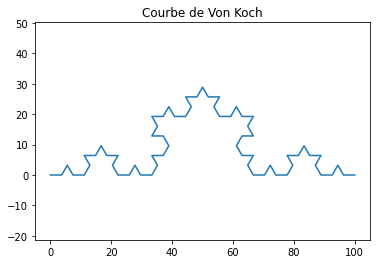

In [14]:
#-------Initialisation des variables-------
abscices_tab = [float('inf')] * nombre_sommets
ordonnees_tab = [float('inf')] * nombre_sommets
# première extrémité
abscices_tab[0] = 0
ordonnees_tab[0] = 0
# deuxième extrémité
abscices_tab[-1] = 100
ordonnees_tab[-1] = 0

#-----------------Calculs--------------
placer_sommets(0, len(abscices_tab) - 1)


#-----------------Affichage----------------
# Nettoyage d'un tracé éventuel
plt.clf()
# tracé
plt.plot(abscices_tab, ordonnees_tab)
# paramétrisation des axes 
plt.axis('equal')
# titre
plt.title("Courbe de Von Koch")
# affichage de la figure obtenue
plt.show()

## 4- Évaluation du temps de calcul

Avant de partir, penchez-vous sur le temps nécessaire pour calculer cette courbe. Nous avons ajouté de quoi mesurer et afficher le temps de calcul mis pour placer les sommets de la courbe.

Changez le nombre d'itérations et regardez comment le temps varie en fonction de celui-ci. À votre avis, cette évolution est-elle linéaire ? quadratique (c’est à dire proportionnel au carré du nombre d’itérations) ? exponentielle ? 

temps de calcul : 0.009124755859375


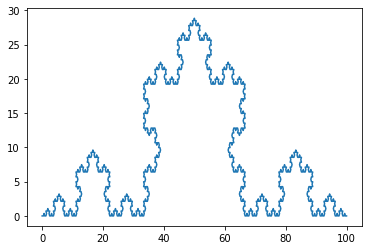

In [56]:
#-------Initialisation des variables-------

# On fixe le nombre d'itération que l'on souhaite obtenir. 
# Ce nombre d'itération doit être positif
nombre_iterations = 5

# On en déduit le nombre de segments de la fractale 
nombre_segments = 4**nombre_iterations

# On en déduit le nombre de sommets 
nombre_sommets = nombre_segments + 1
abscices_tab = [float('inf')] * nombre_sommets
ordonnees_tab = [float('inf')] * nombre_sommets

# première extrémité
abscices_tab[0] = 0
ordonnees_tab[0] = 0

# deuxième extrémité
abscices_tab[-1] = 100
ordonnees_tab[-1] = 0

#-----------------Calculs------------------
debut = time.time()
placer_sommets(0, len(abscices_tab) - 1)
fin = time.time()
print("temps de calcul :", fin - debut)

#-----------------Affichage----------------
# Nettoyage d'un tracé éventuel
plt.clf()
# tracé
plt.plot(abscices_tab, ordonnees_tab)
# affichage de la figure obtenue
plt.show()

#### Réponse
Le temps mis par l’algorithme est exponentiel en fonction du nombre d’itérations (la fonction exponentielle est très fortement croissante.). En effet, chaque itération ajoute 3 avancées du curseur de Turtle ou 3 appel à l’itération suivante et trois rotation du curseur par étape. On peut donc considérer que chaque itération se fait à temps constant + les éventuels appels aux itérations suivantes. Le temps de calcul est donc à peu de chose près proportionnel au nombre d’appels à la fonction iteration_supplementaire. Regardons ce qu’il se passe si n = 3.

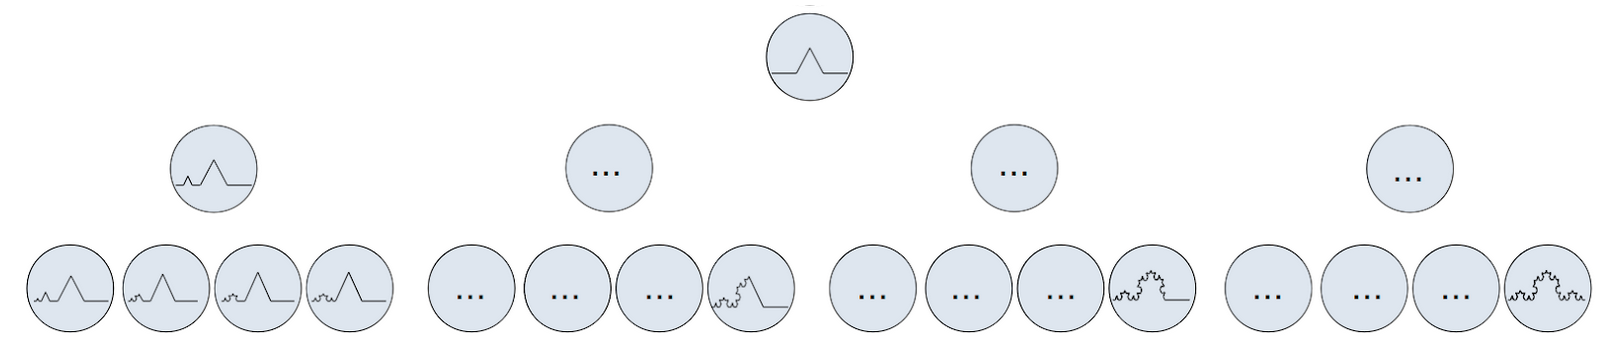

La première ligne correspond à l’itération 1 qui représente le premier appel à la fonction. Cette ligne compte donc 4⁰ appel et génère 4 appels, un pour chaque segments. La ligne suivante compte donc 4¹ appels. Chacun de ces appels engendre 4 appels, la ligne suivante compte donc 4² appels. Il y a donc au total 4⁰ + 4¹ + 4² = 1 - 4³1 - 4=2553 =85appels (cette formule est celle de la somme d’une suite géométrique). À une constante près, le nombre d’appels est donc proportionnel à 4³ pour 3 itérations… On pourrait refaire le même calcul quel que soit le nombre d’itérations et on trouverait toujours un nombre d’appels proportionnel à 4 puissance le nombre d’itération. Comme on considère que le temps passé est proportionnel au nombre d’appels, on dit alors que le temps de calcul est exponentiel en fonction du nombre d’itérations.